<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/worksheets/15_2_Decision_Tree_coded_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding a simple decision tree
---

In this worksheet we are going to work with a data set, using the idea of a decision tree class.  We are going to simplify the model and use Python code to make a simple decision tree classification model.  We will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)
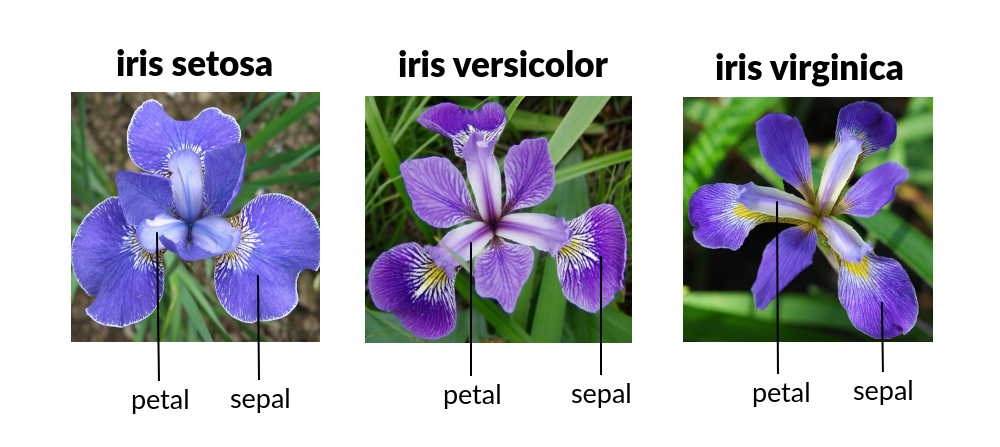
The workflow is:
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?


# About the data set


---
Iris Flower dataset is a University of California, Irvine (UCI) Database from their Machine learning depository.

UCI machine learning repository: The UCI Machine Learning Repository is a collection of databases, and data generators that are used by the machine learning community to do experiments and analysis of machine learning algorithms on data.

For the sake of this project, it has been cleaned and uploaded to github at https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv




### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns


In [374]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)


In [375]:
# the column info (how many columns, what type of data, any missing data?)
print(iris_data.info())
# print(iris_data.shape)
# print(type(iris_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [376]:
# Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
print(iris_data.head(10))
print(iris_data.tail(10))

   sepal-length  sepal-width  petal-length  petal-width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
     sepal-length  sepal-width  petal-length  petal-width         species
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142           5.8  

In [377]:
print(iris_data.isnull().values.any())

False


In [378]:
# how many unique values there are in the species column
species_type = iris_data['species'].unique()
print("----The following are the three class or species types of iris in the data set ---- \n",*species_type, sep = "   ")
# count the number of distinct observations for each column 
print("\n----The number of distinct observations for each column -----")
print(iris_data.nunique())

----The following are the three class or species types of iris in the data set ---- 
   Iris-setosa   Iris-versicolor   Iris-virginica

----The number of distinct observations for each column -----
sepal-length    35
sepal-width     23
petal-length    43
petal-width     22
species          3
dtype: int64


In [379]:
print('sepal-length max=',iris_data['sepal-length'].max(),'min=',iris_data['sepal-length'].min(),'median=',iris_data['sepal-length'].median(), 'mean=',iris_data['sepal-length'].mean(), 'Q3=',iris_data['sepal-length'].quantile(.75),'Q1=',iris_data['sepal-length'].quantile(.25))
print('sepal-width max=',iris_data['sepal-width'].max(),'min=',iris_data['sepal-width'].min(),'median=',iris_data['sepal-width'].median(), 'mean=',iris_data['sepal-width'].mean(), 'Q3=',iris_data['sepal-width'].quantile(.75),'Q1=',iris_data['sepal-width'].quantile(.25))
print('petal-length max=',iris_data['petal-length'].max(),'min=',iris_data['petal-length'].min(),'median=',iris_data['petal-length'].median(), 'mean=',iris_data['petal-length'].mean(), 'Q3=',iris_data['petal-length'].quantile(.75),'Q1=',iris_data['petal-length'].quantile(.25))
print('petal-width max=',iris_data['petal-width'].max(),'min=',iris_data['petal-width'].min(),'median=',iris_data['petal-width'].median(), 'mean=',iris_data['petal-width'].mean(), 'Q3=',iris_data['petal-width'].quantile(.75),'Q1=',iris_data['petal-width'].quantile(.25))


sepal-length max= 7.9 min= 4.3 median= 5.8 mean= 5.843333333333335 Q3= 6.4 Q1= 5.1
sepal-width max= 4.4 min= 2.0 median= 3.0 mean= 3.0540000000000007 Q3= 3.3 Q1= 2.8
petal-length max= 6.9 min= 1.0 median= 4.35 mean= 3.7586666666666693 Q3= 5.1 Q1= 1.6
petal-width max= 2.5 min= 0.1 median= 1.3 mean= 1.1986666666666672 Q3= 1.8 Q1= 0.3


In [380]:
# Find out the maximum, minimum, median and upper and lower quartile values in each of the columns
print(iris_data.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal-length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal-width   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
petal-length  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
petal-width   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.  From now, just use the train data set.


In [381]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Divide the data set into 70% of the rows for training and 30% for testing
train, test = train_test_split(iris_data, test_size=0.30)

### Exercise 3 - assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the indicator is the mean.

*  Drop any null values from each column

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [382]:
# Check and drop any null values from each column in train dataframe
print(train.isnull().values.any())
train.dropna(subset = ["sepal-length", "sepal-width","petal-length","petal-width"])

False


,sepal-length,sepal-width,petal-length,petal-width,species
128,6.4,2.8,5.6,2.1,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica
5,5.4,3.9,1.7,0.4,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
...,...,...,...,...,...
24,4.8,3.4,1.9,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa


In [383]:
print('Train shape : ',train.shape, 'Test shape : ',test.shape)
print(train.describe().T)

Train shape :  (105, 5) Test shape :  (45, 5)
              count      mean       std  min  25%  50%  75%  max
sepal-length  105.0  5.862857  0.780934  4.4  5.1  5.8  6.4  7.7
sepal-width   105.0  3.090476  0.438205  2.0  2.8  3.0  3.4  4.4
petal-length  105.0  3.760952  1.752278  1.2  1.6  4.5  5.1  6.7
petal-width   105.0  1.207619  0.764815  0.1  0.3  1.4  1.8  2.5


In [384]:
# Find the mean for each type column
sepal_length_mean = train['sepal-length'].mean()
sepal_width_mean = train['sepal-width'].mean()
petal_length_mean = train['petal-length'].mean()
petal_width_mean = train['petal-width'].mean()    
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('sepal_length_mean = ', sepal_length_mean, ' sepal_width_mean = ', sepal_width_mean)
print('petal_length_mean = ', petal_length_mean, ' petal_width_mean =', petal_width_mean)

sepal_length_mean =  5.862857142857142  sepal_width_mean =  3.090476190476191
petal_length_mean =  3.7609523809523813  petal_width_mean = 1.2076190476190478


In [385]:
# Another way to find the mean for each type column
train[['sepal-length','sepal-width','petal-length','petal-width']].mean()

sepal-length    5.862857
sepal-width     3.090476
petal-length    3.760952
petal-width     1.207619
dtype: float64

In [386]:
# Function encode : to encode each value into 1 (on or above indicator) and 0 (below indicator) by comparing with indicator
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1
  return 0

In [387]:
# Make a new copy of train dataset for encoding
encodedmean_train = train.copy()
# Encode all values for each column comparing with mean indicator 
encodedmean_train['sepal-length'] = encodedmean_train.apply(encode, axis=1, key='sepal-length', indicator=sepal_length_mean)
encodedmean_train['sepal-width']  = encodedmean_train.apply(encode, axis=1, key='sepal-width',  indicator=sepal_width_mean)
encodedmean_train['petal-length'] = encodedmean_train.apply(encode, axis=1, key='petal-length', indicator=petal_length_mean)
encodedmean_train['petal-width']  = encodedmean_train.apply(encode, axis=1, key='petal-width',  indicator=petal_width_mean)
display(encodedmean_train)
# Find out the number of rows of each species in train dataset
print(encodedmean_train['species'].value_counts())

,sepal-length,sepal-width,petal-length,petal-width,species
128,1,0,1,1,Iris-virginica
124,1,1,1,1,Iris-virginica
5,0,1,0,0,Iris-setosa
21,0,1,0,0,Iris-setosa
0,0,1,0,0,Iris-setosa
...,...,...,...,...,...
24,0,1,0,0,Iris-setosa
7,0,1,0,0,Iris-setosa
113,0,0,1,1,Iris-virginica
32,0,1,0,0,Iris-setosa


Iris-virginica     36
Iris-setosa        36
Iris-versicolor    33
Name: species, dtype: int64


### Exercise 4 - Calculate the proportion of values on or above the mean that are of each species

We are going to focus on the `Iris-virginica` species first.

First we will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

We will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean.

*  Do this for all four columns, for `Iris-virginica`  (4 operations).

Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but we will do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are.  Calculate these

The first one has been done for you.

*  We will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  Calculate these in the same way



In [388]:
# Function to calculate the proportion of each column that are ON OR ABOVE indicator that are of a species
def cal_proportion_aboveindi(df, specie, col_name, indicator):
  train_spec = df[(df[col_name] == 1) & (df['species'] == specie)][col_name].count()
  train_all = df[df[col_name] == 1][col_name].count()
  proportion = train_spec / train_all
  print(col_name , " - Number of rows = ",  train_spec, ", Total rows above ", indicator ," = ", train_all," ,Proportion = ", proportion)
  return proportion


In [389]:
# Get the dataframes and proportion calcuations of those ABOVE the mean for 3 species
print("-----------------------------------value >= mean for Iris-virginica -----------------------------------")
prop_sl_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'sepal-length', 'mean')
prop_sw_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'sepal-width', 'mean') 
prop_pl_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'petal-length', 'mean') 
prop_pw_vir_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-virginica', 'petal-width', 'mean')
   
print("-----------------------------------value >= mean for Iris-versicolor-----------------------------------")
prop_sl_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'sepal-length', 'mean') 
prop_sw_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'sepal-width', 'mean') 
prop_pl_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'petal-length', 'mean') 
prop_pw_ver_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-versicolor', 'petal-width', 'mean')   

print("-----------------------------------value >= mean for Iris-setosa-----------------------------------")
prop_sl_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'sepal-length', 'mean') 
prop_sw_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'sepal-width', 'mean') 
prop_pl_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'petal-length', 'mean') 
prop_pw_set_abovemean = cal_proportion_aboveindi(encodedmean_train, 'Iris-setosa', 'petal-width', 'mean')   


-----------------------------------value >= mean for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  30 , Total rows above  mean  =  52  ,Proportion =  0.5769230769230769
sepal-width  - Number of rows =  10 , Total rows above  mean  =  50  ,Proportion =  0.2
petal-length  - Number of rows =  36 , Total rows above  mean  =  64  ,Proportion =  0.5625
petal-width  - Number of rows =  36 , Total rows above  mean  =  60  ,Proportion =  0.6
-----------------------------------value >= mean for Iris-versicolor-----------------------------------
sepal-length  - Number of rows =  22 , Total rows above  mean  =  52  ,Proportion =  0.4230769230769231
sepal-width  - Number of rows =  8 , Total rows above  mean  =  50  ,Proportion =  0.16
petal-length  - Number of rows =  28 , Total rows above  mean  =  64  ,Proportion =  0.4375
petal-width  - Number of rows =  24 , Total rows above  mean  =  60  ,Proportion =  0.4
-----------------------------------value >= mean

### Exercise 5 - Calculate the proportion of each column, where the value is below mean, that are of species `Iris-virginica`

Repeat the code above, this time looking for values below the mean

In [390]:
# Function to calculate the proportion of each column that are BELOW indicator that are of a species
def cal_proportion_belowindi(df, specie, col_name, indicator):
  train_spec = df[(df[col_name] == 0) & (df['species'] == specie)][col_name].count()
  train_all = df[df[col_name] == 0][col_name].count()
  proportion = train_spec / train_all
  print(col_name , " - Number of rows = ",  train_spec, ", Total rows above ", indicator ," = ", train_all," ,Proportion = ", proportion)
  return proportion 


In [391]:
# Get the dataframes and proportion calcuations of those BELOW the mean for 3 species
print("-----------------------------------value < mean for Iris-virginica -----------------------------------")
prop_sl_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'sepal-length', 'mean')
prop_sw_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'sepal-width', 'mean') 
prop_pl_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'petal-length', 'mean') 
prop_pw_vir_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-virginica', 'petal-width', 'mean') 

-----------------------------------value < mean for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  6 , Total rows above  mean  =  53  ,Proportion =  0.11320754716981132
sepal-width  - Number of rows =  26 , Total rows above  mean  =  55  ,Proportion =  0.4727272727272727
petal-length  - Number of rows =  0 , Total rows above  mean  =  41  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  mean  =  45  ,Proportion =  0.0


### Exercise 5 - calculate for the other two Iris species
---

Do the same calculations for the Iris-versicolor species, then for the Iris-setosa species.






In [392]:
print("-----------------------------------value < mean for Iris-versicolor-----------------------------------")
prop_sl_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'sepal-length', 'mean') 
prop_sw_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'sepal-width', 'mean') 
prop_pl_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'petal-length', 'mean')
prop_pw_ver_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-versicolor', 'petal-width', 'mean') 

print("-----------------------------------value < mean for Iris-setosa-----------------------------------")
prop_sl_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'sepal-length', 'mean')
prop_sw_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'sepal-width', 'mean')
prop_pl_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'petal-length', 'mean')
prop_pw_set_belowmean = cal_proportion_belowindi(encodedmean_train, 'Iris-setosa', 'petal-width', 'mean')

-----------------------------------value < mean for Iris-versicolor-----------------------------------
sepal-length  - Number of rows =  11 , Total rows above  mean  =  53  ,Proportion =  0.20754716981132076
sepal-width  - Number of rows =  25 , Total rows above  mean  =  55  ,Proportion =  0.45454545454545453
petal-length  - Number of rows =  5 , Total rows above  mean  =  41  ,Proportion =  0.12195121951219512
petal-width  - Number of rows =  9 , Total rows above  mean  =  45  ,Proportion =  0.2
-----------------------------------value < mean for Iris-setosa-----------------------------------
sepal-length  - Number of rows =  36 , Total rows above  mean  =  53  ,Proportion =  0.6792452830188679
sepal-width  - Number of rows =  4 , Total rows above  mean  =  55  ,Proportion =  0.07272727272727272
petal-length  - Number of rows =  36 , Total rows above  mean  =  41  ,Proportion =  0.8780487804878049
petal-width  - Number of rows =  36 , Total rows above  mean  =  45  ,Proportion =  0.8

### Exercise 6 - predict from the results
---

Create a list of dictionaries from the results Exercise 4 and 5 (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  A reliable prediction may be one over 0.5

In [393]:
# Create a list of dictionaries from the propotion results
propotion_list = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_abovemean,prop_sw_vir_abovemean,prop_pl_vir_abovemean,prop_pw_vir_abovemean],
 'below_indi':[prop_sl_vir_belowmean, prop_sw_vir_belowmean,prop_pl_vir_belowmean,prop_pw_vir_belowmean]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_abovemean,prop_sw_ver_abovemean,prop_pl_ver_abovemean,prop_pw_ver_abovemean],
 'below_indi':[prop_sl_ver_belowmean, prop_sw_ver_belowmean,prop_pl_ver_belowmean,prop_pw_ver_belowmean]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_abovemean,prop_sw_set_abovemean,prop_pl_set_abovemean,prop_pw_set_abovemean],
 'below_indi':[prop_sl_set_belowmean, prop_sw_set_belowmean,prop_pl_set_belowmean,prop_pw_set_belowmean]
}]
 
display(propotion_list)

[{'above_indi': [0.5769230769230769, 0.2, 0.5625, 0.6],
  'below_indi': [0.11320754716981132, 0.4727272727272727, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.4230769230769231, 0.16, 0.4375, 0.4],
  'below_indi': [0.20754716981132076,
   0.45454545454545453,
   0.12195121951219512,
   0.2],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.0, 0.64, 0.0, 0.0],
  'below_indi': [0.6792452830188679,
   0.07272727272727272,
   0.8780487804878049,
   0.8],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [394]:
# For loops to print out the propotion list above: to show which columns are reliable predictors over 0.5
def printout_list(prop_list, indicator):
  for spec in prop_list:
    for key, value in spec.items():
      if key == 'species':
        print(spec[key] ,'\t\t\t >= ',indicator, '\t\t\t< ',indicator)
      if key == 'type':
        for t, a, b in zip(spec['type'], spec['above_indi'], spec['below_indi']):
            # print('\t\t', t, '\t\t\t', a, '\t\t\t', b)
            if a >= 0.5:
              print('\t\t', t, '\t\t\t', a, '\t\t\t', ' ')
            elif b >= 0.5:  
              print('\t\t', t, '\t\t\t', ' ' , '\t\t\t', b) 

In [395]:
# For loops to print out the propotion list above: to show which columns are reliable predictors over 0.5
printout_list(propotion_list, 'mean')

Iris-virginica 			 >=  mean 			<  mean
		 sepal-length 			 0.5769230769230769 			  
		 petal-length 			 0.5625 			  
		 petal-width 			 0.6 			  
Iris-versicolor 			 >=  mean 			<  mean
Iris-setosa 			 >=  mean 			<  mean
		 sepal-length 			   			 0.6792452830188679
		 sepal-width 			 0.64 			  
		 petal-length 			   			 0.8780487804878049
		 petal-width 			   			 0.8


### Exercise 6 - Make a decision tree
---

Use pencil and paper or a graphical application to create a decision tree for Iris-virginica, using the following rules (use the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree (yours might be slightly different):

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




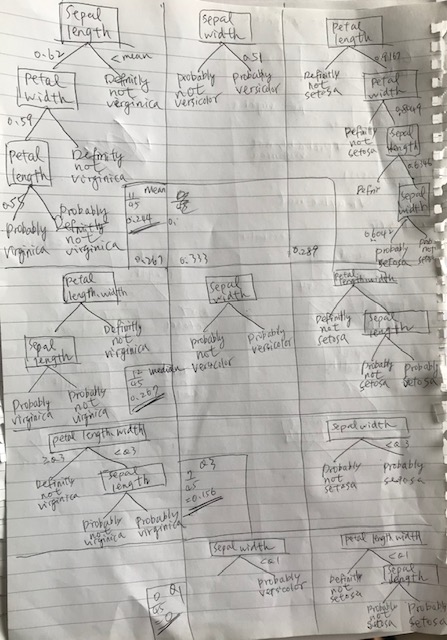

In [396]:
# find the mean for each of the 4 size columns in test dataframe
test_sl_mean = test['sepal-length'].mean()
test_sw_mean = test['sepal-width'].mean()
test_pl_mean = test['petal-length'].mean()
test_pw_mean = test['petal-width'].mean()    
# Print the four means and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_mean = ', test_sl_mean, ' test_sw_mean = ', test_sw_mean)
print('test_pl_mean = ', test_pl_mean, ' test_pw_mean =', test_pw_mean)
print(test.describe())

test_sl_mean =  5.797777777777777  test_sw_mean =  2.968888888888888
test_pl_mean =  3.7533333333333334  test_pw_mean = 1.1777777777777778
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.797778     2.968889      3.753333     1.177778
std        0.936747     0.414960      1.812407     0.767490
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.700000      1.500000     0.200000
50%        5.600000     3.000000      4.000000     1.300000
75%        6.400000     3.100000      5.100000     1.800000
max        7.900000     3.800000      6.900000     2.400000


In [397]:
test_mean = test.copy() # keep original test dataframe in test and encode in test_mean dataframe
# encode the 4 columns in test dataframe
test_mean['sepal-length'] = test_mean.apply(encode, axis=1, key='sepal-length', indicator=test_sl_mean)
test_mean['sepal-width'] = test_mean.apply(encode, axis=1, key='sepal-width', indicator=test_sw_mean)
test_mean['petal-length'] = test_mean.apply(encode, axis=1, key='petal-length', indicator=test_pl_mean)
test_mean['petal-width'] = test_mean.apply(encode, axis=1, key='petal-width', indicator=test_pw_mean)
display(test_mean.info())
test_mean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 127 to 2
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal-length  45 non-null     int64 
 1   sepal-width   45 non-null     int64 
 2   petal-length  45 non-null     int64 
 3   petal-width   45 non-null     int64 
 4   species       45 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


None

,sepal-length,sepal-width,petal-length,petal-width,species
127,1,1,1,1,Iris-virginica
69,0,0,1,0,Iris-versicolor
93,0,0,0,0,Iris-versicolor
99,0,0,1,1,Iris-versicolor
53,0,0,1,1,Iris-versicolor


In [398]:
# Decision Tree to get species 
def get_species(df, measure_type):
  # if df['petal-width'] == 0 and df['petal-length'] == 0:
  #       return 'iris-setosa'
  #       if df['petal-width'] == 0:
  #           return 'iris-versicolor'
  #   return 'Iris-virginica' 

  if df['sepal-length'] == 0 and df['petal-width'] == 0 and df['petal-length'] == 0:
    return None
  else:
    return 'Iris-virginica'
  
  # # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-versicolor'
  # if df['sepal-width'] == 1:
  #   return None
  # else:
  #   return 'Iris-versicolor'

  # # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-setosa'
  # if (df['petal-length'] == 1) and (df['petal-width'] ==1):
  #   return None
  # else :
  #   return 'Iris-setosa' 




In [431]:
# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
def predict_prop(test_df, measure_type):
  correct = 0
  test_size = test_df.shape[0]
  print(test_size)
  for i in range(0, test_size):
    species = get_species(test_df.iloc[i], measure_type)
    if species == test_df.iloc[i]['species']:
        correct += 1
  print(correct)
  return correct / test_size

prop_mean = predict_prop(test_mean, 'mean')
print("Proportion correctly identified Iris-virginica with mean", prop_mean) 

45
14
Proportion correctly identified Iris-virginica with mean 0.3111111111111111


### Exercise 7 - change the measure

We are currently using the mean to act as the decision making line.  We can use the decision tree with a different line.

Change the mean values so that you are instead using the median instead for all four columns.  The code should not need changing except for where you calculated the mean.

Run all the code again.  Is the proportion of correct values better this time?   Is the decision tree still appropriate?


In [400]:
# calculate median: can be changed for different calcualations
def cal_median(df, key):
  return df[key].median()

train_sl_median = cal_median(train, 'sepal-length') 
train_sw_median = cal_median(train, 'sepal-width') 
train_pl_median = cal_median(train, 'petal-length') 
train_pw_median = cal_median(train, 'petal-width')     
# Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.
print('train_sl_median = ', train_sl_median, ' train_sw_median = ', train_sw_median)
print('train_pl_median = ', train_pl_median, ' train_pw_median =', train_pw_median)
print(train.describe())

train_sl_median =  5.8  train_sw_median =  3.0
train_pl_median =  4.5  train_pw_median = 1.4
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.862857     3.090476      3.760952     1.207619
std        0.780934     0.438205      1.752278     0.764815
min        4.400000     2.000000      1.200000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.500000     1.400000
75%        6.400000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [401]:
encodedmedian_train = train.copy()
# encode each column with median: 1: >= median 0:<median
encodedmedian_train['sepal-length'] = encodedmedian_train.apply(encode, axis=1, key='sepal-length', indicator=train_sl_median)
encodedmedian_train['sepal-width'] = encodedmedian_train.apply(encode, axis=1, key='sepal-width', indicator=train_sw_median)
encodedmedian_train['petal-length'] = encodedmedian_train.apply(encode, axis=1, key='petal-length', indicator=train_pl_median)
encodedmedian_train['petal-width'] = encodedmedian_train.apply(encode, axis=1, key='petal-width', indicator=train_pw_median)
# print(encodedmedian_train)

In [402]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the median for 3 species
print("---------------value >= median for Iris-virginica-----------------------------------")
prop_sl_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'sepal-length', 'median')
prop_sw_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'sepal-width', 'median') 
prop_pl_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'petal-length', 'median') 
prop_pw_vir_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-virginica', 'petal-width', 'median') 
print("---------------value >= median for Iris-versicolor -----------------------------------")
prop_sl_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'sepal-length', 'median') 
prop_sw_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'sepal-width', 'median') 
prop_pl_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'petal-length', 'median') 
prop_pw_ver_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-versicolor', 'petal-width', 'median') 

print("---------------value >= median for Iris-setosa-----------------------------------")
prop_sl_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'sepal-length', 'median') 
prop_sw_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'sepal-width', 'median') 
prop_pl_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'petal-length', 'median') 
prop_pw_set_abovemedian = cal_proportion_aboveindi(encodedmedian_train, 'Iris-setosa', 'petal-width', 'median') 


---------------value >= median for Iris-virginica-----------------------------------
sepal-length  - Number of rows =  33 , Total rows above  median  =  58  ,Proportion =  0.5689655172413793
sepal-width  - Number of rows =  17 , Total rows above  median  =  66  ,Proportion =  0.25757575757575757
petal-length  - Number of rows =  36 , Total rows above  median  =  56  ,Proportion =  0.6428571428571429
petal-width  - Number of rows =  36 , Total rows above  median  =  55  ,Proportion =  0.6545454545454545
---------------value >= median for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  24 , Total rows above  median  =  58  ,Proportion =  0.41379310344827586
sepal-width  - Number of rows =  14 , Total rows above  median  =  66  ,Proportion =  0.21212121212121213
petal-length  - Number of rows =  20 , Total rows above  median  =  56  ,Proportion =  0.35714285714285715
petal-width  - Number of rows =  19 , Total rows above  median  =  55  ,Proportion = 

In [403]:
# Get the dataframes and proportion calcuations of those BELOW the Median for 3 species
print("-----------------------------------value < median for Iris-virginica -----------------------------------")
prop_sl_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'sepal-length','Median')
# display(df_col1_virginica)
prop_sw_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'sepal-width','Median') 
prop_pl_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'petal-length','Median') 
prop_pw_vir_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-virginica', 'petal-width','Median') 
print("-----------------------------------value < median for Iris-versicolor -----------------------------------")
prop_sl_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'sepal-length','Median') 
prop_sw_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'sepal-width','Median') 
prop_pl_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'petal-length','Median') 
prop_pw_ver_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-versicolor', 'petal-width','Median') 

print("-----------------------------------value < median for Iris-setosa-----------------------------------")
prop_sl_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'sepal-length','Median') 
prop_sw_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'sepal-width','Median') 
prop_pl_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'petal-length','Median') 
prop_pw_set_belowmedian = cal_proportion_belowindi(encodedmedian_train, 'Iris-setosa', 'petal-width','Median') 

-----------------------------------value < median for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  3 , Total rows above  Median  =  47  ,Proportion =  0.06382978723404255
sepal-width  - Number of rows =  19 , Total rows above  Median  =  39  ,Proportion =  0.48717948717948717
petal-length  - Number of rows =  0 , Total rows above  Median  =  49  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Median  =  50  ,Proportion =  0.0
-----------------------------------value < median for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  9 , Total rows above  Median  =  47  ,Proportion =  0.19148936170212766
sepal-width  - Number of rows =  19 , Total rows above  Median  =  39  ,Proportion =  0.48717948717948717
petal-length  - Number of rows =  13 , Total rows above  Median  =  49  ,Proportion =  0.2653061224489796
petal-width  - Number of rows =  14 , Total rows above  Median  =  50  ,Proporti

In [404]:
# Create a list of dictionaries from the results of median calculations
propotion_list_median = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_abovemedian,prop_sw_vir_abovemedian,prop_pl_vir_abovemedian,prop_pw_vir_abovemedian],
 'below_indi':[prop_sl_vir_belowmedian,prop_sw_vir_belowmedian,prop_pl_vir_belowmedian,prop_pw_vir_belowmedian]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_abovemedian,prop_sw_ver_abovemedian,prop_pl_ver_abovemedian,prop_pw_ver_abovemedian],
 'below_indi':[prop_sl_ver_belowmedian, prop_sw_ver_belowmedian,prop_pl_ver_belowmedian,prop_pw_ver_belowmedian]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_abovemedian,prop_sw_set_abovemedian,prop_pl_set_abovemedian,prop_pw_set_abovemedian],
 'below_indi':[prop_sl_set_belowmedian, prop_sw_set_belowmedian,prop_pl_set_belowmedian,prop_pw_set_belowmedian]
}]
 
display(propotion_list_median)

[{'above_indi': [0.5689655172413793,
   0.25757575757575757,
   0.6428571428571429,
   0.6545454545454545],
  'below_indi': [0.06382978723404255, 0.48717948717948717, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.41379310344827586,
   0.21212121212121213,
   0.35714285714285715,
   0.34545454545454546],
  'below_indi': [0.19148936170212766,
   0.48717948717948717,
   0.2653061224489796,
   0.28],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.017241379310344827, 0.5303030303030303, 0.0, 0.0],
  'below_indi': [0.7446808510638298,
   0.02564102564102564,
   0.7346938775510204,
   0.72],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [405]:
printout_list(propotion_list_median, 'median')

Iris-virginica 			 >=  median 			<  median
		 sepal-length 			 0.5689655172413793 			  
		 petal-length 			 0.6428571428571429 			  
		 petal-width 			 0.6545454545454545 			  
Iris-versicolor 			 >=  median 			<  median
Iris-setosa 			 >=  median 			<  median
		 sepal-length 			   			 0.7446808510638298
		 sepal-width 			 0.5303030303030303 			  
		 petal-length 			   			 0.7346938775510204
		 petal-width 			   			 0.72


In [406]:
# propotion_mean = pd.DataFrame.from_dict(propotion_list) 
# # print(propotion_mean)
# propotion_median = pd.DataFrame.from_dict(propotion_list_median) 
# # print(propotion_median)
# table_mean = pd.pivot_table(propotion_mean, values=['above_mean','below_mean'], index=['species','type'],columns=['type']) #, aggfunc=np.sum)
# table_median = pd.pivot_table(propotion_median, values=['above_mean','below_mean'], index=['species','type'],columns=['type'])
# print(table_mean)
# print(table_median)

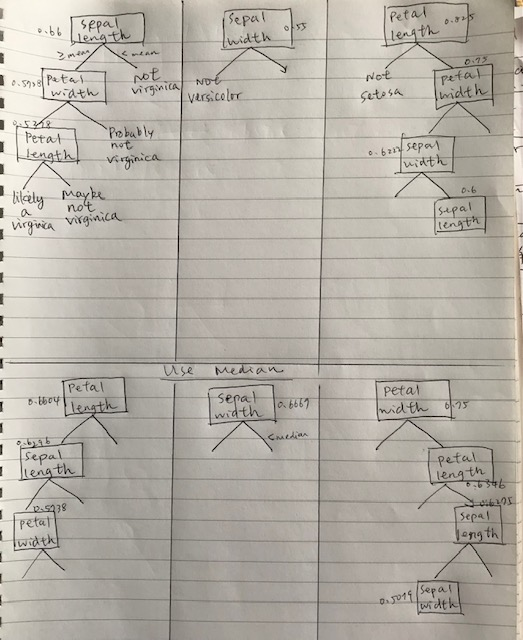

In [407]:

# find the median for each of the 4 size columns in test dataframe : test has original data
test_sl_median = test['sepal-length'].median()
test_sw_median = test['sepal-width'].median()
test_pl_median = test['petal-length'].median()
test_pw_median = test['petal-width'].median()    
# Print the four medians and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_median = ', test_sl_median, ' test_sw_median = ', test_sw_median)
print('test_pl_median = ', test_pl_median, ' test_pw_median =', test_pw_median)
print(test.describe())

test_sl_median =  5.6  test_sw_median =  3.0
test_pl_median =  4.0  test_pw_median = 1.3
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.797778     2.968889      3.753333     1.177778
std        0.936747     0.414960      1.812407     0.767490
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.700000      1.500000     0.200000
50%        5.600000     3.000000      4.000000     1.300000
75%        6.400000     3.100000      5.100000     1.800000
max        7.900000     3.800000      6.900000     2.400000


In [408]:
# test1 has original data and assigns to test2, make changes on test2 and keep original data in test1 
test_median = test.copy()
# encode the 4 columns 
test_median['sepal-length'] = test_median.apply(encode, axis=1, key='sepal-length', indicator=test_sl_median)
test_median['sepal-width'] = test_median.apply(encode, axis=1, key='sepal-width', indicator=test_sw_median)
test_median['petal-length'] = test_median.apply(encode, axis=1, key='petal-length', indicator=test_pl_median)
test_median['petal-width'] = test_median.apply(encode, axis=1, key='petal-width', indicator=test_pw_median)
display(test_median.head())


,sepal-length,sepal-width,petal-length,petal-width,species
127,1,1,1,1,Iris-virginica
69,1,0,0,0,Iris-versicolor
93,0,0,0,0,Iris-versicolor
99,1,0,1,1,Iris-versicolor
53,0,0,1,1,Iris-versicolor


In [409]:
# Decision Tree Model to get species based on median calculation: Only for 'Iris-virginica'
def get_species_median(df):
  
  if (df['petal-length'] == 0) or (df['petal-width'] == 0):
    return None
  elif df['sepal-length'] == 0:
    return None
  else:
    return 'Iris-virginica'

def predict_prop_median(test_df):
  # use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
  correct_median = 0
  test_median_size = test_df.shape[0]
  print(test_median_size)
  for i in range(0, test_median_size):
    species = get_species_median(test_df.iloc[i])
    if species == test_df.iloc[i]['species']:
        correct_median += 1
  print(correct_median)
  return correct_median / test_median_size
  
prop_median = predict_prop_median(test_median)
print ("Proportion correctly identified by measuring median", prop_median) 
# prop_median2 = predict_prop(test_median,'median')
# print ("Proportion correctly identified by measuring median", prop_median2) 


# filt_test_vir = test_median['species'] == 'Iris-virginica'
# prop_vir_median = predict_prop(test_median[filt_test_vir], 'median')
# print("Proportion correctly identified mean for Iris-virginica", prop_vir_median) 

# filt_test_ver = test_median['species'] == 'Iris-versicolor'
# prop_ver_median = predict_prop(test_median[filt_test_ver], 'median')
# print("Proportion correctly identified mean for Iris-versicolor", prop_ver_median) 

# filt_test_set = test_median['species'] == 'Iris-setosa'
# prop_set_median = predict_prop(test_median[filt_test_set], 'median')
# print("Proportion correctly identified mean for Iris-setosa", prop_set_median) 

45
14
Proportion correctly identified by measuring median 0.3111111111111111



What do you notice? (write your answer here)

The proportion correctly identified by measuring mean and median have the close results and sometimes the same results. measuring with median seems slightly higher than measuring with mean when they have close results. 

In additions, both of the propotions of petal length, petal width and sepal width on or above mean and median are pretty close to each other. Therefore the 3 types are the key to classfiy the species as 'Iris-virginica'. 

### Exercise 8 - try different measures
---

Do the same again but with upper quantile, then again with the lower quantile.  Is it making any difference?  Which give the best looking results?

In [410]:
# find the Upper quantile for each of the 4 size columns in test dataframe 
sl_q3 = train['sepal-length'].quantile(.75)
sw_q3 = train['sepal-width'].quantile(.75)
pl_q3 = train['petal-length'].quantile(.75)
pw_q3 = train['petal-width'].quantile(.75)   
# Print the four upper quantile and compare to the output of train.describe() to check that they have been calculated correctly.
print('sw_q3 = ', sl_q3, ', sw_q3 = ', sw_q3,', pl_q3 = ', pl_q3, ', pw_q3 =', pw_q3)

print(train.describe())

sw_q3 =  6.4 , sw_q3 =  3.4 , pl_q3 =  5.1 , pw_q3 = 1.8
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.862857     3.090476      3.760952     1.207619
std        0.780934     0.438205      1.752278     0.764815
min        4.400000     2.000000      1.200000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.500000     1.400000
75%        6.400000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [411]:
encodedq3_train = train.copy()
# encode each column with upper quantile: 1: >= q3 0:<q3
encodedq3_train['sepal-length'] = encodedq3_train.apply(encode, axis=1, key='sepal-length', indicator=sl_q3)
encodedq3_train['sepal-width'] = encodedq3_train.apply(encode, axis=1, key='sepal-width', indicator=sw_q3)
encodedq3_train['petal-length'] = encodedq3_train.apply(encode, axis=1, key='petal-length', indicator=pl_q3)
encodedq3_train['petal-width'] = encodedq3_train.apply(encode, axis=1, key='petal-width', indicator=pw_q3)
print(encodedq3_train)

     sepal-length  sepal-width  petal-length  petal-width         species
128             1            0             1            1  Iris-virginica
124             1            0             1            1  Iris-virginica
5               0            1             0            0     Iris-setosa
21              0            1             0            0     Iris-setosa
0               0            1             0            0     Iris-setosa
..            ...          ...           ...          ...             ...
24              0            1             0            0     Iris-setosa
7               0            1             0            0     Iris-setosa
113             0            0             0            1  Iris-virginica
32              0            1             0            0     Iris-setosa
16              0            1             0            0     Iris-setosa

[105 rows x 5 columns]


In [412]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the upper Quantile for 3 species
print("---------------value >= q3 for Iris-virginica -----------------------------------")
prop_sl_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'sepal-length','Upper Quantile')
prop_sw_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'sepal-width','Upper Quantile') 
prop_pl_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'petal-length','Upper Quantile') 
prop_pw_vir_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-virginica', 'petal-width','Upper Quantile') 
print("---------------value >= q3 for Iris-versicolor ---------------------------------")
prop_sl_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'sepal-length','Upper Quantile') 
prop_sw_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'sepal-width','Upper Quantile') 
prop_pl_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'petal-length','Upper Quantile') 
prop_pw_ver_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-versicolor', 'petal-width','Upper Quantile') 

print("---------------value >= q3 for Iris-setosa -----------------------------------")
prop_sl_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'sepal-length','Upper Quantile') 
prop_sw_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'sepal-width','Upper Quantile') 
prop_pl_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'petal-length','Upper Quantile') 
prop_pw_set_aboveq3 = cal_proportion_aboveindi(encodedq3_train, 'Iris-setosa', 'petal-width','Upper Quantile') 


---------------value >= q3 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  20 , Total rows above  Upper Quantile  =  30  ,Proportion =  0.6666666666666666
sepal-width  - Number of rows =  3 , Total rows above  Upper Quantile  =  28  ,Proportion =  0.10714285714285714
petal-length  - Number of rows =  29 , Total rows above  Upper Quantile  =  30  ,Proportion =  0.9666666666666667
petal-width  - Number of rows =  31 , Total rows above  Upper Quantile  =  32  ,Proportion =  0.96875
---------------value >= q3 for Iris-versicolor ---------------------------------
sepal-length  - Number of rows =  10 , Total rows above  Upper Quantile  =  30  ,Proportion =  0.3333333333333333
sepal-width  - Number of rows =  1 , Total rows above  Upper Quantile  =  28  ,Proportion =  0.03571428571428571
petal-length  - Number of rows =  1 , Total rows above  Upper Quantile  =  30  ,Proportion =  0.03333333333333333
petal-width  - Number of rows =  1 , Total rows above

In [413]:
# Get the dataframes and proportion calcuations of those BELOW the upper Quantile for 3 species
print("---------------value < q3 for Iris-virginica-----------------------------------")
prop_sl_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'sepal-length','Upper Quantile')
# display(df_col1_virginica_abovemean)
prop_sw_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'sepal-width','Upper Quantile') 
prop_pl_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'petal-length','Upper Quantile') 
prop_pw_vir_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-virginica', 'petal-width','Upper Quantile') 
print("---------------value < q3 for Iris-versicolor -----------------------------------")
prop_sl_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'sepal-length','Upper Quantile') 
prop_sw_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'sepal-width','Upper Quantile') 
prop_pl_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'petal-length','Upper Quantile') 
prop_pw_ver_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-versicolor', 'petal-width','Upper Quantile') 

print("---------------value < q3 for Iris-setosa -----------------------------------")
prop_sl_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'sepal-length','Upper Quantile') 
prop_sw_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'sepal-width','Upper Quantile') 
prop_pl_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'petal-length','Upper Quantile') 
prop_pw_set_belowq3 = cal_proportion_belowindi(encodedq3_train, 'Iris-setosa', 'petal-width','Upper Quantile') 


---------------value < q3 for Iris-virginica-----------------------------------
sepal-length  - Number of rows =  16 , Total rows above  Upper Quantile  =  75  ,Proportion =  0.21333333333333335
sepal-width  - Number of rows =  33 , Total rows above  Upper Quantile  =  77  ,Proportion =  0.42857142857142855
petal-length  - Number of rows =  7 , Total rows above  Upper Quantile  =  75  ,Proportion =  0.09333333333333334
petal-width  - Number of rows =  5 , Total rows above  Upper Quantile  =  73  ,Proportion =  0.0684931506849315
---------------value < q3 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  23 , Total rows above  Upper Quantile  =  75  ,Proportion =  0.30666666666666664
sepal-width  - Number of rows =  32 , Total rows above  Upper Quantile  =  77  ,Proportion =  0.4155844155844156
petal-length  - Number of rows =  32 , Total rows above  Upper Quantile  =  75  ,Proportion =  0.4266666666666667
petal-width  - Number of rows =  32 , Tot

In [414]:
# Create a list of dictionaries from the results of q3 calculations
propotion_list_q3 = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_aboveq3,prop_sw_vir_aboveq3,prop_pl_vir_aboveq3,prop_pw_vir_aboveq3],
 'below_indi':[prop_sl_vir_belowq3, prop_sw_vir_belowq3,prop_pl_vir_belowq3,prop_pw_vir_belowq3]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_aboveq3,prop_sw_ver_aboveq3,prop_pl_ver_aboveq3,prop_pw_ver_aboveq3],
 'below_indi':[prop_sl_ver_belowq3, prop_sw_ver_belowq3,prop_pl_ver_belowq3,prop_pw_ver_belowq3]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_aboveq3,prop_sw_set_aboveq3,prop_pl_set_aboveq3,prop_pw_set_aboveq3],
 'below_indi':[prop_sl_set_belowq3, prop_sw_set_belowq3,prop_pl_set_belowq3,prop_pw_set_belowq3]
}]
 
display(propotion_list_q3)

[{'above_indi': [0.6666666666666666,
   0.10714285714285714,
   0.9666666666666667,
   0.96875],
  'below_indi': [0.21333333333333335,
   0.42857142857142855,
   0.09333333333333334,
   0.0684931506849315],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.3333333333333333,
   0.03571428571428571,
   0.03333333333333333,
   0.03125],
  'below_indi': [0.30666666666666664,
   0.4155844155844156,
   0.4266666666666667,
   0.4383561643835616],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.0, 0.8571428571428571, 0.0, 0.0],
  'below_indi': [0.48, 0.15584415584415584, 0.48, 0.4931506849315068],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [415]:
printout_list(propotion_list_q3, 'Q3')

Iris-virginica 			 >=  Q3 			<  Q3
		 sepal-length 			 0.6666666666666666 			  
		 petal-length 			 0.9666666666666667 			  
		 petal-width 			 0.96875 			  
Iris-versicolor 			 >=  Q3 			<  Q3
Iris-setosa 			 >=  Q3 			<  Q3
		 sepal-width 			 0.8571428571428571 			  


In [416]:
# find the q3 for each of the 4 size columns in test dataframe : test has original data
test_sl_q3 = test['sepal-length'].quantile(.75)
test_sw_q3 = test['sepal-width'].quantile(.75)
test_pl_q3 = test['petal-length'].quantile(.75)
test_pw_q3 = test['petal-width'].quantile(.75)   
# Print the four q3 and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_q3 = ', test_sl_q3, ' test_sw_q3 = ', test_sw_q3)
print('test_pl_q3 = ', test_pl_q3, ' test_pw_q3 =', test_pw_q3)
print(test.describe())


test_sl_q3 =  6.4  test_sw_q3 =  3.1
test_pl_q3 =  5.1  test_pw_q3 = 1.8
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.797778     2.968889      3.753333     1.177778
std        0.936747     0.414960      1.812407     0.767490
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.700000      1.500000     0.200000
50%        5.600000     3.000000      4.000000     1.300000
75%        6.400000     3.100000      5.100000     1.800000
max        7.900000     3.800000      6.900000     2.400000


In [417]:
# test1 has original data and assign to test_q3, make changes on test_q3 and keep original data in test1 
test_q3= test.copy()
# encode the 4 columns 
test_q3['sepal-length'] = test_q3.apply(encode, axis=1, key='sepal-length', indicator=test_sl_q3)
test_q3['sepal-width'] = test_q3.apply(encode, axis=1, key='sepal-width', indicator=test_sw_q3)
test_q3['petal-length'] = test_q3.apply(encode, axis=1, key='petal-length', indicator=test_pl_q3)
test_q3['petal-width'] = test_q3.apply(encode, axis=1, key='petal-width', indicator=test_pw_q3)
display(test_q3.head())

,sepal-length,sepal-width,petal-length,petal-width,species
127,0,0,0,1,Iris-virginica
69,0,0,0,0,Iris-versicolor
93,0,0,0,0,Iris-versicolor
99,0,0,0,0,Iris-versicolor
53,0,0,0,0,Iris-versicolor


In [418]:
# Decision Tree to get species based on median calculation: Only for 'Iris-virginica'
def get_species_q3(df):
  # ADD CODE HERE TO RETURN None if sepal-length is below mean (encoded as 0) 
  # or if petal-width is below mean (encoded as 0) or if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
  if df['species'] == 'Iris-virginica':
    if (df['petal-length'] == 0) or (df['petal-width'] == 0):
      return None
    elif df['sepal-length'] == 0:
      return None
    else:
      return 'Iris-virginica'

# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
def predict_prop_q3(test_df):
  correct_q3 = 0
  test_q3_size = test_df.shape[0]
  print(test_q3_size)
  for i in range(0, test_q3_size):
    species = get_species_q3(test_df.iloc[i])
    if species == test_df.iloc[i]['species']:
        correct_q3 += 1
  print(correct_q3)
  return correct_q3 / test_q3_size
 
prop_q3 = predict_prop_q3(test_q3)
print("Proportion correctly identified by measuring upper quantile", prop_q3) 
prop_q3_1 = predict_prop(test_q3,'upper quantile')
print("Proportion correctly identified by measuring upper quantile", prop_q3_1) 

45
11
Proportion correctly identified by measuring upper quantile 0.24444444444444444
45
14
Proportion correctly identified by measuring upper quantile 0.3111111111111111


In [419]:
# find the lower quantile for each of the 4 size columns in test dataframe 
sl_q1 = train['sepal-length'].quantile(.25)
sw_q1 = train['sepal-width'].quantile(.25)
pl_q1 = train['petal-length'].quantile(.25)
pw_q1 = train['petal-width'].quantile(.25)   
# Print the four upper quantile and compare to the output of train.describe() to check that they have been calculated correctly.
print('sw_q1 = ', sl_q1, ' , sw_q1 = ', sw_q1,', pl_q1 = ', pl_q1, ', pw_q1 =', pw_q1)
print(train.describe())

sw_q1 =  5.1  , sw_q1 =  2.8 , pl_q1 =  1.6 , pw_q1 = 0.3
       sepal-length  sepal-width  petal-length  petal-width
count    105.000000   105.000000    105.000000   105.000000
mean       5.862857     3.090476      3.760952     1.207619
std        0.780934     0.438205      1.752278     0.764815
min        4.400000     2.000000      1.200000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.500000     1.400000
75%        6.400000     3.400000      5.100000     1.800000
max        7.700000     4.400000      6.700000     2.500000


In [420]:
# assign a copy of train dataframe to new variable. train has origainal dataset
encodedq1_train = train.copy()
# encode each column with lower quantile: 1: >= q1 0:<q1
encodedq1_train['sepal-length'] = encodedq1_train.apply(encode, axis=1, key='sepal-length', indicator=sl_q1)
encodedq1_train['sepal-width'] = encodedq1_train.apply(encode, axis=1, key='sepal-width', indicator=sw_q1)
encodedq1_train['petal-length'] = encodedq1_train.apply(encode, axis=1, key='petal-length', indicator=pl_q1)
encodedq1_train['petal-width'] = encodedq1_train.apply(encode, axis=1, key='petal-width', indicator=pw_q1)
print(encodedq1_train)

     sepal-length  sepal-width  petal-length  petal-width         species
128             1            1             1            1  Iris-virginica
124             1            1             1            1  Iris-virginica
5               1            1             1            1     Iris-setosa
21              1            1             0            1     Iris-setosa
0               1            1             0            0     Iris-setosa
..            ...          ...           ...          ...             ...
24              0            1             1            0     Iris-setosa
7               0            1             0            0     Iris-setosa
113             1            0             1            1  Iris-virginica
32              1            1             0            0     Iris-setosa
16              1            1             0            1     Iris-setosa

[105 rows x 5 columns]


In [421]:
# Get the dataframes and proportion calcuations of those ON OR ABOVE the Lower Quantile for 3 species
print("---------------value >= q1 for Iris-virginica -----------------------------------")
prop_sl_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'sepal-length', 'Q1')
prop_sw_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'sepal-width', 'Q1') 
prop_pl_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'petal-length', 'Q1') 
prop_pw_vir_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-virginica', 'petal-width', 'Q1') 
print("---------------value >= q1 for Iris-versicolor -----------------------------------")
prop_sl_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'sepal-length', 'Q1') 
prop_sw_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'sepal-width', 'Q1') 
prop_pl_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'petal-length', 'Q1') 
prop_pw_ver_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-versicolor', 'petal-width', 'Q1') 

print("---------------value >= q1 for Iris-setosa -----------------------------------")
prop_sl_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'sepal-length', 'Q1') 
prop_sw_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'sepal-width', 'Q1') 
prop_pl_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'petal-length', 'Q1') 
prop_pw_set_aboveq1 = cal_proportion_aboveindi(encodedq1_train, 'Iris-setosa', 'petal-width', 'Q1') 


---------------value >= q1 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  35 , Total rows above  Q1  =  84  ,Proportion =  0.4166666666666667
sepal-width  - Number of rows =  26 , Total rows above  Q1  =  85  ,Proportion =  0.3058823529411765
petal-length  - Number of rows =  36 , Total rows above  Q1  =  81  ,Proportion =  0.4444444444444444
petal-width  - Number of rows =  36 , Total rows above  Q1  =  83  ,Proportion =  0.43373493975903615
---------------value >= q1 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  31 , Total rows above  Q1  =  84  ,Proportion =  0.36904761904761907
sepal-width  - Number of rows =  24 , Total rows above  Q1  =  85  ,Proportion =  0.2823529411764706
petal-length  - Number of rows =  33 , Total rows above  Q1  =  81  ,Proportion =  0.4074074074074074
petal-width  - Number of rows =  33 , Total rows above  Q1  =  83  ,Proportion =  0.39759036144578314
---------------value

In [422]:
# Get the dataframes and proportion calcuations of those BELOW the Lower Quantile for 3 species
print("---------------value < q1 for Iris-virginica -----------------------------------")
prop_sl_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'sepal-length', 'Q1')
prop_sw_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'sepal-width', 'Q1') 
prop_pl_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'petal-length', 'Q1') 
prop_pw_vir_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-virginica', 'petal-width', 'Q1') 
print("---------------value >= q1 for Iris-versicolor -----------------------------------")
prop_sl_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'sepal-length', 'Q1') 
prop_sw_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'sepal-width', 'Q1') 
prop_pl_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'petal-length', 'Q1') 
prop_pw_ver_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-versicolor', 'petal-width', 'Q1') 

print("---------------value >= q1 for Iris-setosa -----------------------------------")
prop_sl_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'sepal-length', 'Q1') 
prop_sw_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'sepal-width', 'Q1') 
prop_pl_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'petal-length', 'Q1') 
prop_pw_set_belowq1 = cal_proportion_belowindi(encodedq1_train, 'Iris-setosa', 'petal-width', 'Q1') 


---------------value < q1 for Iris-virginica -----------------------------------
sepal-length  - Number of rows =  1 , Total rows above  Q1  =  21  ,Proportion =  0.047619047619047616
sepal-width  - Number of rows =  10 , Total rows above  Q1  =  20  ,Proportion =  0.5
petal-length  - Number of rows =  0 , Total rows above  Q1  =  24  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Q1  =  22  ,Proportion =  0.0
---------------value >= q1 for Iris-versicolor -----------------------------------
sepal-length  - Number of rows =  2 , Total rows above  Q1  =  21  ,Proportion =  0.09523809523809523
sepal-width  - Number of rows =  9 , Total rows above  Q1  =  20  ,Proportion =  0.45
petal-length  - Number of rows =  0 , Total rows above  Q1  =  24  ,Proportion =  0.0
petal-width  - Number of rows =  0 , Total rows above  Q1  =  22  ,Proportion =  0.0
---------------value >= q1 for Iris-setosa -----------------------------------
sepal-length  - Number of rows =  18 ,

In [423]:
# Create a list of dictionaries from the results of q3 calculations
propotion_list_q1 = [{'species':'Iris-virginica',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_vir_aboveq1,prop_sw_vir_aboveq1,prop_pl_vir_aboveq1,prop_pw_vir_aboveq1],
 'below_indi':[prop_sl_vir_belowq1, prop_sw_vir_belowq1,prop_pl_vir_belowq1,prop_pw_vir_belowq1]
},{'species':'Iris-versicolor',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_ver_aboveq1,prop_sw_ver_aboveq1,prop_pl_ver_aboveq1,prop_pw_ver_aboveq1],
 'below_indi':[prop_sl_ver_belowq1, prop_sw_ver_belowq1,prop_pl_ver_belowq1,prop_pw_ver_belowq1]
},{'species':'Iris-setosa',
 'type':['sepal-length','sepal-width','petal-length', 'petal-width'],
 'above_indi':[prop_sl_set_aboveq1,prop_sw_set_aboveq1,prop_pl_set_aboveq1,prop_pw_set_aboveq1],
 'below_indi':[prop_sl_set_belowq1, prop_sw_set_belowq1,prop_pl_set_belowq1,prop_pw_set_belowq1]
}]
 
display(propotion_list_q1)

[{'above_indi': [0.4166666666666667,
   0.3058823529411765,
   0.4444444444444444,
   0.43373493975903615],
  'below_indi': [0.047619047619047616, 0.5, 0.0, 0.0],
  'species': 'Iris-virginica',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.36904761904761907,
   0.2823529411764706,
   0.4074074074074074,
   0.39759036144578314],
  'below_indi': [0.09523809523809523, 0.45, 0.0, 0.0],
  'species': 'Iris-versicolor',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']},
 {'above_indi': [0.21428571428571427,
   0.4117647058823529,
   0.14814814814814814,
   0.1686746987951807],
  'below_indi': [0.8571428571428571, 0.05, 1.0, 1.0],
  'species': 'Iris-setosa',
  'type': ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']}]

In [424]:
printout_list(propotion_list_q1,'Q1')


Iris-virginica 			 >=  Q1 			<  Q1
		 sepal-width 			   			 0.5
Iris-versicolor 			 >=  Q1 			<  Q1
Iris-setosa 			 >=  Q1 			<  Q1
		 sepal-length 			   			 0.8571428571428571
		 petal-length 			   			 1.0
		 petal-width 			   			 1.0


In [425]:
# find the q1 for each of the 4 size columns in test dataframe : test has original data
test_sl_q1 = test['sepal-length'].quantile(.25)
test_sw_q1 = test['sepal-width'].quantile(.25)
test_pl_q1 = test['petal-length'].quantile(.25)
test_pw_q1 = test['petal-width'].quantile(.25)   
# Print the four medians and compare to the output of test.describe() to check that they have been calculated correctly.
print('test_sl_q1 = ', test_sl_q1, ' test_sw_q1 = ', test_sw_q1)
print('test_pl_q1 = ', test_pl_q1, ' test_pw_q1 =', test_pw_q1)
print(test.describe())


test_sl_q1 =  5.1  test_sw_q1 =  2.7
test_pl_q1 =  1.5  test_pw_q1 = 0.2
       sepal-length  sepal-width  petal-length  petal-width
count     45.000000    45.000000     45.000000    45.000000
mean       5.797778     2.968889      3.753333     1.177778
std        0.936747     0.414960      1.812407     0.767490
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.700000      1.500000     0.200000
50%        5.600000     3.000000      4.000000     1.300000
75%        6.400000     3.100000      5.100000     1.800000
max        7.900000     3.800000      6.900000     2.400000


In [426]:
# test1 has original data and assign to test_q3, make changes on test_q3 and keep original data in test1 
test_q1= test.copy()
# encode the 4 columns 
test_q1['sepal-length'] = test_q1.apply(encode, axis=1, key='sepal-length', indicator=test_sl_q1)
test_q1['sepal-width'] = test_q1.apply(encode, axis=1, key='sepal-width', indicator=test_sw_q1)
test_q1['petal-length'] = test_q1.apply(encode, axis=1, key='petal-length', indicator=test_pl_q1)
test_q1['petal-width'] = test_q1.apply(encode, axis=1, key='petal-width', indicator=test_pw_q1)
display(test_q1.head())

,sepal-length,sepal-width,petal-length,petal-width,species
127,1,1,1,1,Iris-virginica
69,1,0,1,1,Iris-versicolor
93,0,0,1,1,Iris-versicolor
99,1,1,1,1,Iris-versicolor
53,1,0,1,1,Iris-versicolor


In [427]:
# Decision Tree to get species based on Lower Quantile calculation: Only for 'Iris-virginica'
def get_species_q1(df):
  # ADD CODE HERE TO RETURN None if sepal-length is below lower quantile (encoded as 0) 
  # or if petal-width is below lower quantile (encoded as 0) or if petal-length is below lower quantile (encoded as 0), otherwise return 'Iris-virginia'
  if df['sepal-length'] == 1:
    return None
  elif (df['petal-length'] == 1) or (df['petal-width'] == 1):
    return None
  else:
    return 'Iris-virginica'
# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct_q1 = 0
test_q1_size = test_q1.shape[0]
print(test_q1_size)
for i in range(0, test_q1_size):
  species = get_species_q1(test_q1.iloc[i])
  if species == test_q1.iloc[i]['species']:
      correct_q1 += 1
print(correct_q1)
print ("Proportion correctly identified by measuring lower quantile", correct_q1 / test_q1_size) 

prop_q1_1 = predict_prop(test_q1,'lower quantile')
print("Proportion correctly identified by measuring lower quantile", prop_q1_1) 


45
0
Proportion correctly identified by measuring lower quantile 0.0
45
14
Proportion correctly identified by measuring lower quantile 0.3111111111111111



Measuring with upper quantile (Q3) is higer correctly identified then using lower quantile (Q1).  Also, with Q3, 3 key elements are still Petal widht, petal length, and sepal length. It's smilar to measuring with mean and median.

However, the proportion is lower then mean and median.  so by measuring with mean and median and Q3 are sensitive. 

The propotion correctly identified by measuring mean and median are quite close and the propotion correctly mean > median > q3 > q1

### Exercise 9 - try a different species

Run the mean test again for the Iris-versicolor species.  Again, try some different decision making lines.

What are the results.  Record them in the text cell below:

In [432]:
# Decision Tree to get species : Only for 'Iris-versicolor'
def get_species_mean_ve(df):
  # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-versicolor'
  if df['species'] == 'Iris-versicolor':
    if df['sepal-width'] == 1:
      return None
    else:
      return 'Iris-versicolor'
  
  

def get_species_mean_se(df):  
  # ADD CODE HERE TO RETURN None if sepal-width is below mean (encoded as 0) , otherwise return 'Iris-setosa'
  if df['species'] == 'Iris-setosa':
    if (df['petal-length'] == 1):
      return None
    elif (df['petal-width'] ==1):
      return None
    elif (df['sepal-length'] == 1):
      return None
    elif (df['sepal-width'] == 0):
      return None
    else :
      return 'Iris-setosa' 


# use the get_species(df) function to predict the species, count how many are predicted correct and use this to calculate the proportion correct
correct_mean_ve = 0
test_size = test_mean.shape[0]
print(test_size)
for i in range(0, test_size):
  species_ve = get_species_mean_ve(test_mean.iloc[i])
  if species_ve == test_mean.iloc[i]['species']:
      correct_mean_ve += 1
print(correct_mean_ve)
print ("Proportion correctly identified for Iris-versicolor with mean", correct_mean_ve / test_size) 

correct_mean_se = 0
test_size = test_mean.shape[0]
print(test_size)
for i in range(0, test_size):
  species_se = get_species_mean_se(test_mean.iloc[i])
  if species_se == test_mean.iloc[i]['species']:
      correct_mean_se += 1
print(correct_mean_se)
print ("Proportion correctly identified for Iris-setosa with mean", correct_mean_se / test_size) 


45
15
Proportion correctly identified for Iris-versicolor with mean 0.3333333333333333
45
13
Proportion correctly identified for Iris-setosa with mean 0.28888888888888886


Write your answers here:  

From the proportion correctly identified with mean results above, the model does identify the I

# New logic introduced in this worksheet:

1.  Adding headings to a CSV if none currently exist
2.  Splitting a data set into train and test sets

In [429]:
# converting data frame to csv
iris_data.to_csv("iris_withheaders.csv", header=names, index=False)
  
# display modified csv file
file2 = pd.read_csv("iris_withheaders.csv")
print('\nModified file:')
print(file2)


Modified file:
     sepal-length  sepal-width  petal-length  petal-width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


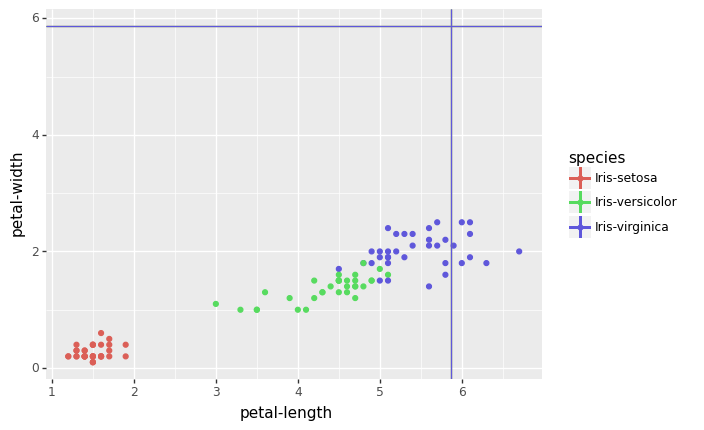

<ggplot: (8752355814517)>

In [430]:
## this type of plot will show the distribution on a chart
from plotnine import *
ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + geom_point() + geom_vline(train, aes(xintercept=train['sepal-length'].mean(), color='species')) + geom_hline(train, aes(yintercept=train['sepal-length'].mean(), color='species'))